In [1]:
import Metrica_IO as mio
import Metrica_Vizuals as miz
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
DATA_DIR=r'C:\Users\User\Desktop\FootballAnalysis\sample-data-master'
game_id=2
team_1="Home"
team_2="Away"

# Reading Event Data
event=mio.read_event_data(DATA_DIR,game_id)
event=mio.transform_coord_system(event)
# Home Goals
home_goals=event[(event["Subtype"].str.contains('-GOAL')) & (event["Team"]=="Home")]

#Reading the Tracking Data
tracking_home=mio.read_tracking_data(DATA_DIR,game_id,team_1)
tracking_away=mio.read_tracking_data(DATA_DIR,game_id,team_2)
tracking_away=mio.transform_coord_system(tracking_away)
tracking_home=mio.transform_coord_system(tracking_home)

Reading team: home
Reading team: away


### Plotting a home goal's position.

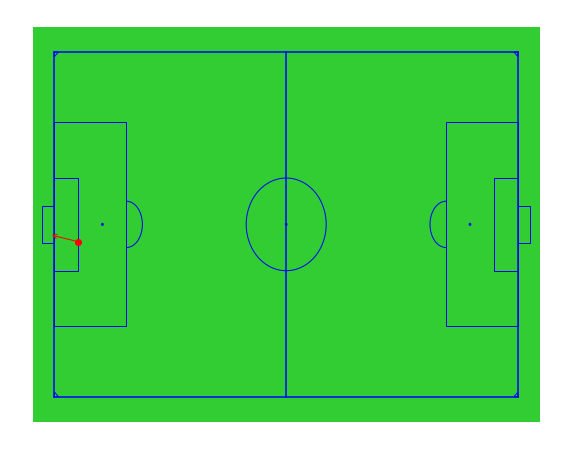

In [3]:
# Plotting the pitch
fig_pitch,ax_pitch=miz.plot_pitch() 
ax_pitch.plot(home_goals.loc[:,"Start X"][:1],home_goals.loc[:,"Start Y"][:1],marker='o',color='r')
ax_pitch.annotate("",xy=(home_goals.loc[:,"End X"][:1],home_goals.loc[:,"End Y"][:1]),xytext=(home_goals.loc[:,"Start X"][:1],home_goals.loc[:,"Start Y"][:1]), alpha=0.6, arrowprops=dict(arrowstyle="->",color='r'));

### Plotting series of event that resulted to a goal.

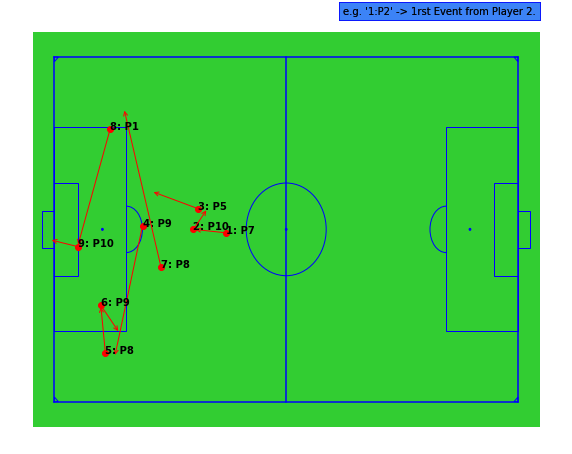

In [4]:
fig,ax=miz.plot_events(event.iloc[190:199],annotate_player=True,annotate_turn=True)

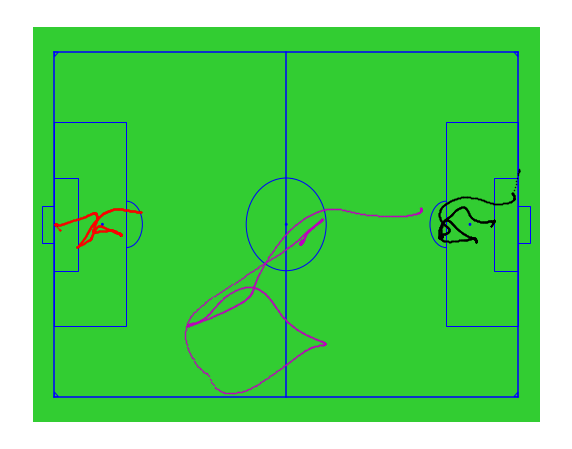

In [5]:
#Plot a players' positions for 1 minute (60 sec)
# Player and ball positions are sampled at 25 Hz.
# 60 sec * 25 hz= 1500
fig_pitch,ax_pitch=miz.plot_pitch()
# Clearly the goalKeeper of the away team
ax_pitch.plot(tracking_away.loc[:1500,"Away_25_x"],tracking_away.loc[:1500,"Away_25_y"],'r.',MarkerSize=1)
# Clearly the goalKeeper of the home team
ax_pitch.plot(tracking_home.loc[:1500,"Home_11_x"],tracking_home.loc[:1500,"Home_11_y"],'k.',MarkerSize=1)
ax_pitch.plot(tracking_home.loc[:1500,"Home_8_x"],tracking_home.loc[:1500,"Home_3_y"],'m.',MarkerSize=1);

### Plotting players' and balls' position in Kick off.

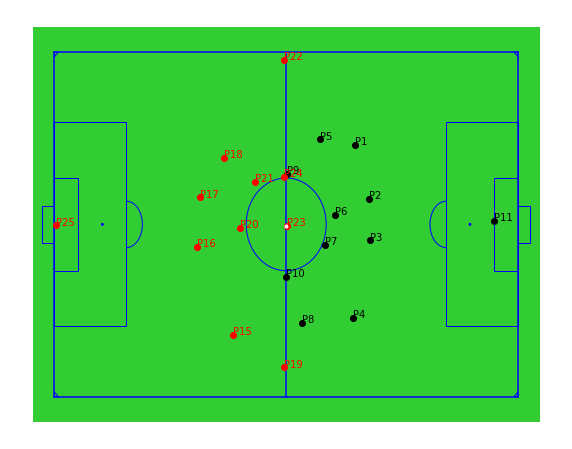

In [6]:
#Plot positions in STARTING Kick off
# Ball is colored in white.
kick_off_frame=51
fig,ax =miz.plot_frame(tracking_home.iloc[51],tracking_away.iloc[51],annotate_player=True)

### Plotting passes and shot leading up to the third goal in the match.

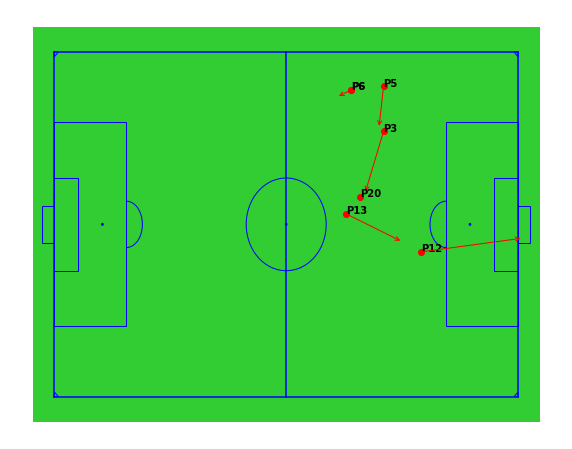

In [7]:
# 3rd goal 1717:1724
fig, ax=miz.plot_events(event.iloc[1717:1724],annotate_player=True)

### Plotting all shots by Player 9 of the home team.

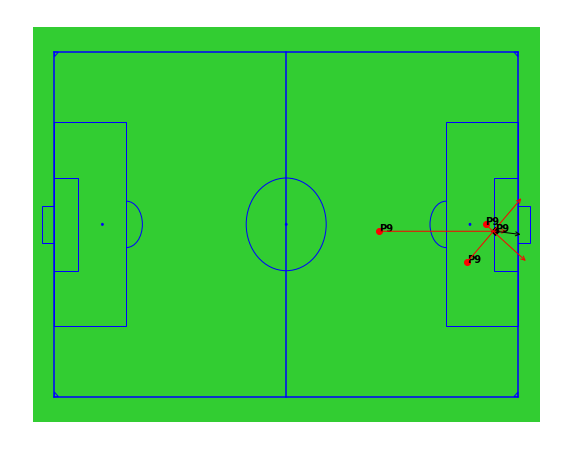

In [8]:
shot_indices=event[(event["From"]=="Player9") & (event["Team"]=="Home") & (event["Type"]=="SHOT") ].index
non_goals=event.iloc[shot_indices][~(event.iloc[shot_indices]["Subtype"].str.contains('-GOAL'))]
goals=event.iloc[shot_indices][(event.iloc[shot_indices]["Subtype"].str.contains('-GOAL'))]
fig,ax=miz.plot_pitch()
# Plot non goals with default red color
miz.plot_events(non_goals,figax=(fig,ax),annotate_player=True)
# Plot goals with black color
miz.plot_events(goals,figax=(fig,ax),marker="D",alpha=0.9,annotate_player=True,color='black');

### Plotting the positions of all players at Player 9's goal

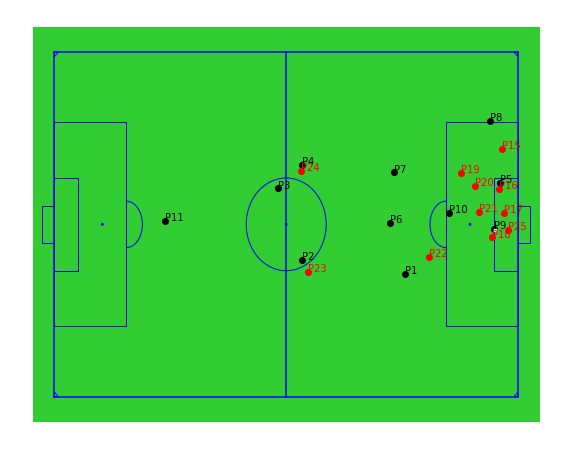

In [9]:
p9_goal_idx=goals.index[0]
frame=event.loc[p9_goal_idx,"Start Frame"] 
miz.plot_frame(tracking_home.iloc[frame],tracking_away.iloc[frame],annotate_player=True);